## Исследование данных о российском кинопрокате



**Цель исследования**:
1. изучить рынок российского кинопроката и выявить текущие тренды
2. провести анализ фильмов, получивших государственную поддержку

**Ход исследования**

Источник информации - данные, опубликованные на портале открытых данных Министерства культуры Российской Федерации. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных. 
 
Исследование пройдёт в три этапа:
 1. Обзор данных.
 2. Предобработка данных.
 3. Исследование российского кинопроката и выявление текущих трендов
 4. Подробный анализ фильмов, получивших государственную поддержку



<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='DarkGreen'>👌 Хорошо, сделано описание проекта. 👍</font>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import Counter

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [2]:
df_movies = pd.read_csv('/datasets/mkrf_movies.csv')
df_shows = pd.read_csv('/datasets/mkrf_shows.csv')


Выведем основную информацию о датафремах и проверим тип данных

In [3]:
df_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
df_shows.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [6]:
df_movies.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


В датафрейме df_movies столбец по которому необходимо объединить данные из двух датафремах имеет тип данных object. Для начала приведем столбец puNumber в датафрейме df_movies к целочисленному типу данных.

In [7]:
try:
    df_movies['puNumber'] = df_movies['puNumber'].astype('int')
except:
    print('Не удалось перевести в целочисленный тип данных')

Не удалось перевести в целочисленный тип данных


Привести к целочисленному типу не получилось, возможно это связано с тем, что в столбце присутствуют не числовые данные. Выполним проверку.

In [8]:
df_movies[~df_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


В столбце присутствует два значения с не числовыми данными. Посмотрим на них внимательнее.

In [9]:
df_movies.loc[804, 'puNumber']

' 111004112'

In [10]:
df_movies.loc[804, 'puNumber'] = df_movies.loc[804, 'puNumber'].strip()

In [11]:
df_movies.loc[1797, 'puNumber']

'нет'

In [12]:
df_movies.loc[1797, 'puNumber'] = '0'

Ошибки исправлены. Приводим снова к целочисленному типу данных.

In [13]:
try:
    df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'], errors='coerce').astype('int')
except:
    print('Не удалось перевести в целочисленный тип данных')

In [14]:
data = df_movies.merge(df_shows, how='left', on='puNumber')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В исходном датафрейме df_movies содержится 7486 строк. Выведя информацию об объединенном датафреме видно, что все строки из исходного датафрема вошли в объединенный, таким образом потери данных при объединении датафреймов не обнаружено. 

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

- show_start_date - необходимо привести к типу DateTime
- ratings - необходимо привести к вещественному типу данных

In [17]:
#Изменим тип данных на вещественный
data['ratings'] = pd.to_numeric(data['ratings'], errors='coerce').astype('float')

In [18]:
# Приводим к типу datetime дату премьеры
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [19]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [20]:
# Комментарий ревьюера
temp = data.copy() # создаем копию датасета до преобразования
len(temp)

7486

In [21]:
pd.concat([data.isna().sum(), data.isna().mean().apply(lambda x: '{0:.1f}%'.format(x * 100))], 
          axis=1).rename(columns={0:'количество пропусков', 1:'доля пропусков'})

,количество пропусков,доля пропусков
title,0,0.0%
puNumber,0,0.0%
show_start_date,0,0.0%
type,0,0.0%
film_studio,18,0.2%
production_country,2,0.0%
director,9,0.1%
producer,568,7.6%
age_restriction,0,0.0%
refundable_support,7154,95.6%


Большая часть пропусков присутствует в столбцах с информацией по бюджету и господдержке (около 95%). Также много пропусков столбце по кассовым сборам (около 57%) и в столбцах с продюсером, рейтингом и жанром (7-13%).

Для большей наглядности визуализируем пропуски на тепловой карте.

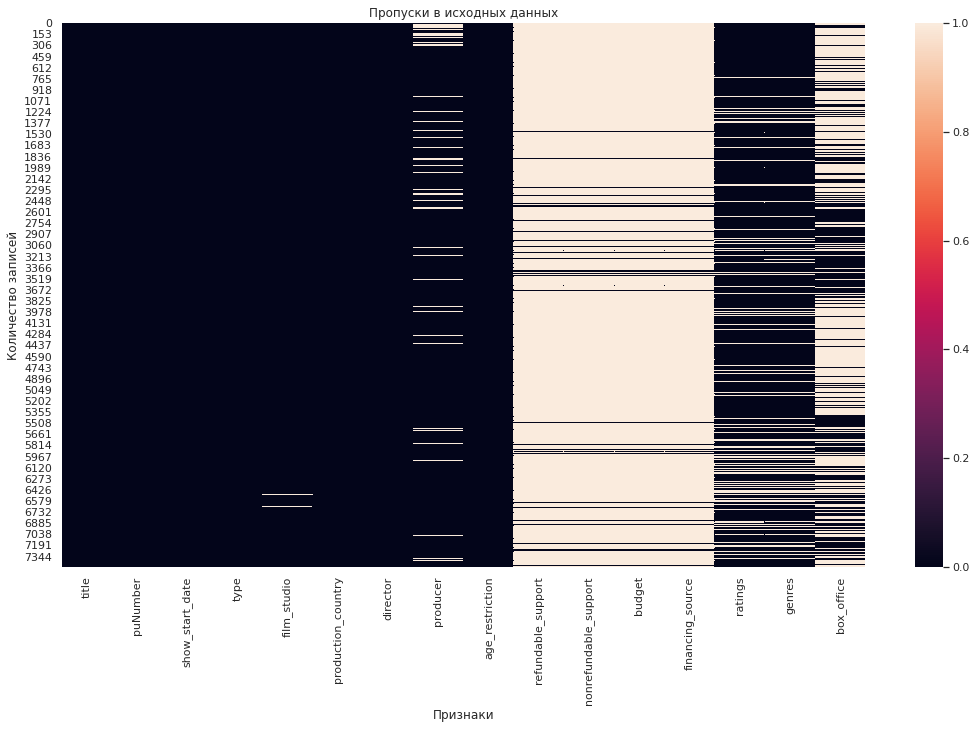

In [22]:
sns.set(rc={'figure.figsize':(18,10)})
sns.heatmap(data.isna(), cbar=True).set_title('Пропуски в исходных данных')
plt.ylabel('Количество записей')
plt.xlabel('Признаки')
plt.show()

Проверим столбец со страной-производителем.

In [23]:
data.query('production_country.isna()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


Учитывая, что:
- по 1-му пропуску данные для гражданина РФ будет восстановить не трудно - Ералаш является кинематографом СССР
- по 2-му пропуску затруднительно будет восстановить данные, поэтому укажем "Данные по стране производителю отсутствуют"

In [24]:
data.loc[data['puNumber'] == 111001216,'production_country'] = 'СССР'

In [25]:
data.loc[data['puNumber'] == 214000410,'production_country'] = 'Данные по стране производителю отсутствуют'

Учитывая, что пропуски в столбцах director, film_studio, producer, genres будет весьма сложно восстановить (или даже невозможно).Для исследования эти столбцы не несут существенной ценности - заполним пропуски следующим образом "Данные по ... отсутствуют".

In [26]:
data['director'] = data['director'].fillna('Данные по режиссеру отсутствуют')
data['film_studio'] = data['film_studio'].fillna('Данные по студии-производителю отсутствуют')
data['producer'] = data['producer'].fillna('Данные по продюсеру отсутствуют')
data['genres'] = data['genres'].fillna('Данные по жанру отсутствуют')

Столбцы с категориальными данными обработали, следующим шагом посмотрим на столбцы, которые содержат количественные значения.

Из тепловой карты видно, что пропуски в столбцах refundable_support, nonrefundable_support, budget и financing_source (хоть и не числовой) находятся на одинаковых местах, а также количество пропусков в них одинаковое. Возможно предположить, что информация есть только о Российских картинах. Проверим эту гипотезу.

In [27]:
report = data['budget'].isna().rename('Пропуск в информации по бюджету').to_frame()
report['is_rus'] = data['production_country'].str.contains('Россия')
report.groupby(['Пропуск в информации по бюджету']).agg(['sum', 'count']).set_axis(['Россия', 'Всего'], axis=1)

,Россия,Всего
Пропуск в информации по бюджету,,
False,332,332
True,1653,7154


Гипотеза подтвердилась, информация есть только по фильмам Российского производства и при этом по большей части (более 80%) данных по бюджету, источнику финансирования и объёму возвратных/ невозвратных средств государственной поддержки нет, а значит заполнять пропуски средним или медианным значением не совсем правильно. Оставим пропуски без заполнения.

Значение в столбце рейтинг заполнять не будем, т.к. даже у одианковых жанров и даже у одинаковых фильмов (снятых разными студиями/ режиссерами) рейтинги могут сильно отличаться. 

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Проверим данные на наличие явных дубликатов

In [28]:
data.duplicated().sum()

0

Явные дубликаты отсутствуют. Следующим шагом посмотрим, что с неявными дубликатами.

In [29]:
data.nunique()

title                    6772
puNumber                 7484
show_start_date          1965
type                        8
film_studio              5491
production_country        951
director                 4812
producer                 5350
age_restriction             5
refundable_support         34
nonrefundable_support      75
budget                    290
financing_source            3
ratings                    80
genres                    743
box_office               2938
dtype: int64

**title** - вполне возможно, что названия фильмов могут повторяться.

In [30]:
data.query('title.duplicated(keep=False)').sort_values(by='title').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
455,100 миллионов евро,121013712,2012-06-06 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
454,100 миллионов евро,221024616,2016-05-25 12:00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.1,комедия,NaN
4852,127 часов,121000811,2011-01-27 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
5058,127 часов,221069011,2011-05-18 12:00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.7,"триллер,биография,драма",NaN
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.7,"боевик,триллер,драма",NaN


**puNumber** - номер должен быть уникальным, но по какой-то причине под одним номером вышло несколько фильмов, возможно это связано с ошибкой при заполнении данных, при этом эта ошибка не повлияет на результаты исследования. Оставим без изменений.

In [31]:
 data.query('puNumber.duplicated(keep=False)')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5067,Анализируй это!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5068,Анализируй то!,221054410,2010-05-25 12:00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


**show_start_date** - вполне возможно, что в одинаковые время выходит несколько фильмов, тут ничего странного нет.

В целом как для столбца **type, film_studio, director** и т.д. значения могут повторяться. Тут ничего странного не наблюдается. Могут быть некоторые сокращения в имени, но на результаты исследования этот факт не повлияет, а времени на обработку таких строк замет достаточно большое количество времени.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
           
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [32]:
data['type'].value_counts()

Художественный                4520
 Художественный               1389
Анимационный                   828
Прочие                         406
Документальный                 288
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

Проанализировав столбец **type** видно, что в значениях есть лишние пробелы. Избавимся от них и тем самым уберем ненужные дубликаты.

In [33]:
data['type'] = data['type'].str.strip()

Выполним аналогичное преобразование для других столбцов.

In [34]:
for column in ['title', 'director', 'producer', 'film_studio', 'production_country', 'genres', 'age_restriction']:
    print('Столбец', column)
    print('Уникальных значений до преобразования', data[column].nunique())
    data[column] = data[column].str.strip()
    print('Уникальных значений после преобразования', data[column].nunique())
    print()

Столбец title
Уникальных значений до преобразования 6772
Уникальных значений после преобразования 6772

Столбец director
Уникальных значений до преобразования 4812
Уникальных значений после преобразования 4802

Столбец producer
Уникальных значений до преобразования 5350
Уникальных значений после преобразования 5335

Столбец film_studio
Уникальных значений до преобразования 5491
Уникальных значений после преобразования 5463

Столбец production_country
Уникальных значений до преобразования 951
Уникальных значений после преобразования 935

Столбец genres
Уникальных значений до преобразования 743
Уникальных значений после преобразования 743

Столбец age_restriction
Уникальных значений до преобразования 5
Уникальных значений после преобразования 5



Получается, что лишние пробелы были в столбцах producer, film_studio и production_country

Проверим содержатся ли числовые значения в категориальных столбцах.

In [35]:
for column in ['title', 'director', 'producer', 'film_studio', 'production_country', 'genres', 'age_restriction']:
    value =  data[data[column].str.isdigit()].shape[0]
    
    if value > 0:
        print('Количество числовых значений в столбце', column, 'составялет', value)
        display(data[data[column].str.isdigit()])
        print()

Количество числовых значений в столбце title составялет 4


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2490,1915,121009015,2015-04-23 12:00:00,Художественный,"Бладвайн Медиа, Сэнтисаунд, Строгмен",США,"Алик Моухибян, Герин Хованнисян","Терри Леонард, Алек Моухибян, Фиона Уолш, Гери...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.6,драма,636862.5
3892,2012,221082310,2010-07-15 12:00:00,Художественный,"Центрополис Интертейнмент, Коламбиа Пикчерз, Ф...",США,Роланд Эммерих,"Харальд Клозер, Лари Джей Франко, Роланд Эммерих",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.9,"фантастика,приключения,боевик",NaN
5216,999,131000111,2011-08-12 12:00:00,Художественный,"Кинокомпания ""MG Production""",Казахстан,"Марина Кунарова, Ерлан Нурмухамбетов",Ернар Маликов,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.5,драма,4775.0
6641,695,112000719,2019-01-31 12:00:00,Документальный,"ООО ""Студия Остров""",Россия,Ю.Малюгин,С.Мирошниченко,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,Данные по жанру отсутствуют,NaN



Количество числовых значений в столбце production_country составялет 1


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7247,Дело Коллини,121027219,2019-09-19 12:00:00,Художественный,"Константин Филм, Глобал Скрин, Севен Пикчерз Сван",2019,Марко Кройцпайнтнер,"Мартин Московиц, Кристоф Мюллер, Марсель Хартг...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"детектив,драма,криминал",NaN


Что касается названий фильм - действительно такие фильмы есть, а вот касательно страны-производителя, то естественно страны «2019» не существует. Вероятно, тут ошибка при заполнении данных, поэтому для этой строки укажем "Данные по стране производителю отсутствуют"

In [36]:
data.loc[data['puNumber'] == 121027219,'production_country'] = 'Данные по стране производителю отсутствуют'

Посмотрим какие еще могут быть опечатки в данных.

In [37]:
Counter(data['title'])

Counter({'Открытый простор': 1,
         'Особо важное задание': 1,
         'Особо опасен': 3,
         'Остановился поезд': 1,
         'Любовь и голуби': 1,
         'Любовь и сигареты': 1,
         'Отпетые мошенники.': 1,
         'Отпуск за свой счет': 1,
         'Превосходство Борна /По одноименной новелле Роберта Ладлэма/': 1,
         'Ответный ход': 1,
         'Малышка на миллион /По мотивам рассказов Ф.Х.Тула из сборника "Клейма от канатов"/': 2,
         'Преданный садовник': 1,
         'Отель /По мотивам пьесы Джона Уэбстера/': 1,
         'Председатель': 1,
         'Осенний марафон': 1,
         'Осень': 1,
         'Неподдающиеся': 1,
         'Неподсуден': 1,
         'Незабываемый 1919-й год': 1,
         'Незаконченная жизнь': 1,
         'Операция "Ы" и другие приключения Шурика': 1,
         'Неизвестные страницы из жизни разведчика': 1,
         'Неисправимый лгун': 1,
         'Призрак замка Моррисвиль': 1,
         'Оружейный барон': 2,
         'Отставной ко

В данных встречаются некоторые "хвосты" в виде нижнего подчеркивания ("_"). Проверим в каких еще столбцах встречаются хвосты и преобразуем их к нормальному виду.

In [38]:
for column in ['title', 'director', 'producer', 'film_studio', 'production_country', 'genres', 'age_restriction']:
    value = data.loc[data[column].str.contains('_'), column].count()
    if value > 0:
        print('Количество хвостов "_" в столбце до преобразования', column, 'составялет', value)
        data[column] = data[column].apply(lambda x: ''.join(x.strip() for x in x.split('_')))
        print('Количество хвостов "_" в столбце после преобразования', column, 'составялет', data.loc[data[column].str.contains('_'), column].count())
        print()

Количество хвостов "_" в столбце до преобразования title составялет 167
Количество хвостов "_" в столбце после преобразования title составялет 0

Количество хвостов "_" в столбце до преобразования film_studio составялет 3
Количество хвостов "_" в столбце после преобразования film_studio составялет 0



In [39]:
Counter(data['production_country'])

Counter({'США': 2175,
         'СССР': 378,
         'Франция': 302,
         'СССР, Венгрия': 2,
         'Германия-Великобритания': 1,
         'Великобритания - Италия': 2,
         'Чехословакия': 1,
         'США - Франция - Турция': 2,
         'Новая Зеландия': 5,
         'Канада - Франция - Испания': 1,
         'США-Германия': 19,
         'США - Великобритания': 90,
         'Великобритания': 259,
         'США - Германия': 29,
         'Франция - Мексика - США': 1,
         'Россия, Казахстан, США': 1,
         'СССР, Швеция': 2,
         'СССР, Франция, Англия, Куба, ГДР': 1,
         'Германия': 110,
         'Великобритания-США-Германия-КНР': 1,
         'СССР, ЧССР, Западный Берлин, ПНР': 1,
         'СССР, Италия': 1,
         'Гонконг, КНР': 1,
         'США - Франция': 29,
         'США - Япония - Франция - Великобритания': 1,
         'Гонконг - Сингапур - Таиланд - Великобритания': 1,
         'США-Канада': 8,
         'Франция - Италия - Великобритания - США': 2,


В отдельных строках страны разделены запятыми, а в других знаком тире. Стандартизируем и скорректируем "-" на ",".

In [40]:
print('Количество записей до преобразования составялет', 
      data.loc[data['production_country'].str.contains('-'), 'production_country'].count())

data['production_country'] = data['production_country'].apply(lambda x: ', '.join(x.strip() for x in x.split('-')))

print('Количество записей после преобразования составялет', 
      data.loc[data['production_country'].str.contains('-'), 'production_country'].count())

Количество записей до преобразования составялет 1513
Количество записей после преобразования составялет 0


Проверим наличие строк в столбцах которые содержат "при участии".

In [41]:
for column in ['title', 'director', 'producer', 'film_studio', 'production_country', 'genres', 'age_restriction']:
    value = data.loc[data[column].str.contains('при участии'), column].count()
    if value > 0:
        print('Количество строк в столбце ', column, ' которые содержат "при участии" составялет', value)

Количество строк в столбце  director  которые содержат "при участии" составялет 8
Количество строк в столбце  producer  которые содержат "при участии" составялет 2
Количество строк в столбце  film_studio  которые содержат "при участии" составялет 23


Заменим словосочетание "при участии" на запятую (стандартизация).

In [42]:
data = data.apply(lambda x: x.replace({'при участии ':', '}, regex=True))

В целом лишние пробелы, хвосты "_" на концах, знаки "-" вместо запятых и другие подходы по стандартизации в столбцах с названием картины, режиссером, продюсером, студией, страной-производителем и жанром обработали. Можно идти дальше.

In [43]:
data['financing_source'].unique()

array([nan, 'Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Со столбцом financing_source все в порядке (за исключением пропусков, которые восстановить не получится).

Также выполним стандартизацию букв - заменим "ё" на "е".

In [44]:
data = data.apply(lambda x: x.replace({'Ё':'Е', 'ё':'е'}, regex=True))

В результате анализа столбцов, которые содержат категориальные данные можно сделать вывод, что общая проблема — это невнимательность при заведении данных, которая отражается в лишних пробелах, хвостах в виде знаков нижнего подчеркивания, а также отсутствии стандартизации при заполнении данных (например, в столбце со страной-производителем в которых несколько стран по отдельным строкам стары перечисляются через запятую, а по другим через знак тире).

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

Проверим строки, в которых сумма бюджета меньше, чем сумма возвратных и невозвратных средств господдержки.

In [45]:
bad_budget = data.loc[data['budget'] < (data['nonrefundable_support'] + data['refundable_support']),:]
bad_budget.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.0,23000000.0,0.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1
2058,Дуxless 2,111000415,2015-01-26 12:00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.0,75000000.0,0.0,Фонд кино,6.6,драма,446163511.0
2472,Воин (2015),111017315,2015-09-28 12:00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,10000000.0,70000000.0,0.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4
2532,Бармен.,111009615,2015-05-26 12:00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,20000000.0,0.0,0.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,60000000.0,100000000.0,0.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4


In [46]:
bad_budget.shape[0]

17

Создадим отдельный датафрейм в который войдут строки, в которых есть данные по бюджету и отличные от нуля. Исходя из этих данных будем восстанавливать пропуски.

In [47]:
good_budget = data.query('budget !=0 and ~budget.isna()')
good_budget.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,Пока еще жива,111005313,2013-10-11 12:00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,26500000.0,79411900.0,Министерство культуры,8.1,"драма,мелодрама",365353.6
1448,Бесславные придурки,111003314,2014-03-28 12:00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,26000000.0,37142857.0,Министерство культуры,NaN,Данные по жанру отсутствуют,28140.0
1498,Невидимки,111004213,2013-09-10 12:00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,107847945.0,176023490.0,Фонд кино,5.3,"комедия,фантастика",19957031.5
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,28000000.0,40574140.0,Министерство культуры,4.2,драма,55917.5
1792,Братья Ч,111004414,2014-04-23 12:00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,25000000.0,40015122.0,Министерство культуры,6.4,драма,232100.0


Посчитаем отношение бюджета к сумме возвратных и невозвратных средств господдержки.

In [48]:
persent_budget =  good_budget['budget'] / (good_budget['refundable_support'] + good_budget['nonrefundable_support'])

In [49]:
persent_budget.describe()

count    315.000000
mean       2.429542
std        2.019277
min        1.274299
25%        1.522230
50%        1.688435
75%        2.677679
max       22.705056
dtype: float64

Заполним пропуски в исходном датафрейме исходя из суммы возвратных и невозвратных средств господдержки, умноженное на медианное значение (выбрана медиана, чтобы исключить влияние слишком больших значений, так медианное значение составляет 1.68, а среднее 2.42), которое было посчитано выше.

In [50]:
data.loc[bad_budget.index,'budget'] = \
    ((data.loc[bad_budget.index,'refundable_support'] + 
      data.loc[bad_budget.index,'nonrefundable_support']) * 
     persent_budget.median())

Проверка.

In [51]:
data.loc[data['budget'] < (data['nonrefundable_support'] + data['refundable_support']),:].shape[0]

0

In [52]:
old_data_shape = data.shape[0]

Посмотрим есть ли в данных аномальные значения.

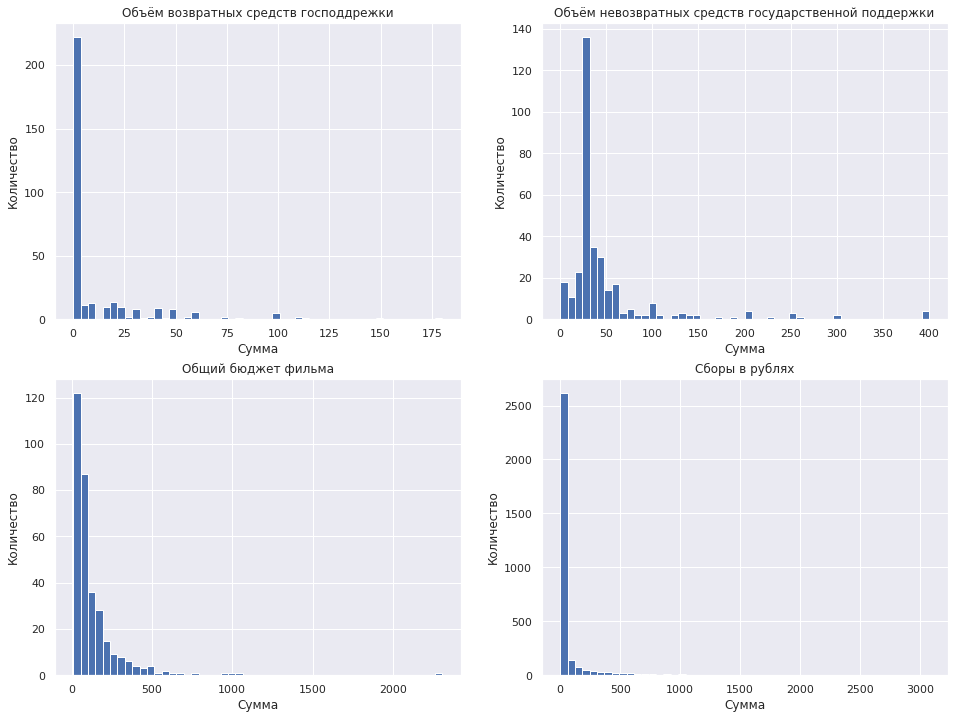

In [53]:
columns=['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
title_name = ['Объём возвратных средств господдрежки','Объём невозвратных средств государственной поддержки','Общий бюджет фильма','Сборы в рублях']

counter = 0
plt.figure(figsize=(16,12))
for column in columns:
    counter += 1
    plt.subplot(2, 2, counter)
    plt.hist(data[column]/10**6, bins=50)
    plt.title(title_name[counter-1])
    plt.xlabel('Сумма')
    plt.ylabel('Количество')
    

 
   

В количественных переменных наблюдается по 1-му выраженному пику и небольшое количество выбивающихся значений. Обработаем столбцы с бюджетом и сбором от прокатов от аномальных (слишком больших или редких) значений. 

Столбцы с объемом средств господдержки трогать не будем, так как не совсем понятно, какая сумма является слишком большой и в целом не понятно, как определяется объем возвратных/ невозвратных средств господдержки.

Для удобства переведем из рублей в млн руб.

In [54]:
columns=['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
for col in columns:
    data[col] /= 10**6

Проверим есть ли нулевые сборы от проката

In [55]:
data.query('box_office == 0').shape[0]

24

Получается, что в данных есть 24 строки по которым сборы от проката равны нулю, можно предположить, что по этим строкам информации не было и данные заполнили нулями, так как сценарий, что фильмы, вышедшие в прокат в кинотеатрах, не собрали ни одного рубля маловероятен.

Построим диаграмму размаха для сборов от проката и посмотрим на выбивающиеся значения.

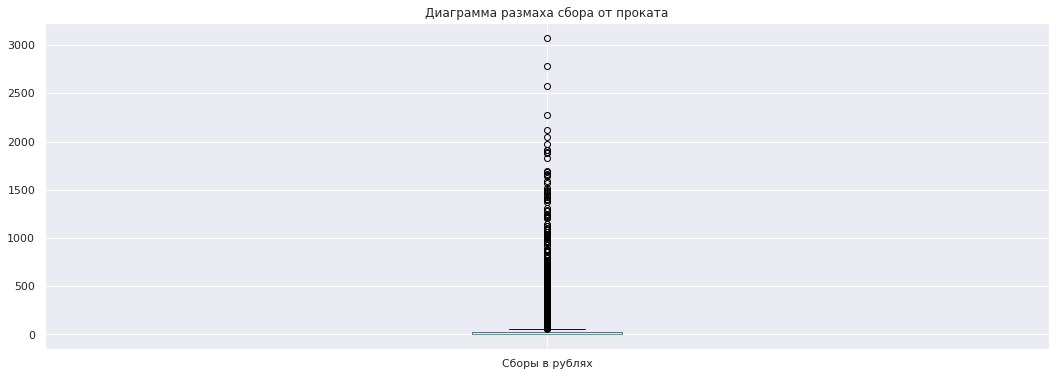

In [56]:
data.query('box_office > 0').plot(y='box_office', kind='box', figsize=(18,6), grid=True, label='Сборы в рублях' )
plt.title('Диаграмма размаха сбора от проката',  fontsize='12')

plt.show()

In [57]:
data.query('box_office > 1800').shape[0]

12

Из диаграммы размаха по сборам от прокатов видно, что значения свыше 1.8 млрд руб. довольно редкие, в целом можем исключить их из выборки, учитывая, что таких значенйи всего 12.

In [58]:
data.drop(data.query('box_office > 1800').index, inplace = True)

In [59]:

temp2 = temp.copy()
temp2.box_office /= 10**6
temp1, temp2 = data.box_office.sum(), temp2.box_office.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(215261.76729828003, 241519.72247712998, 10.87)

В выборке остались значения, которые лежат за гарницей правого уса диаграммы размаха. Посмотрим их количество и

In [60]:
describe_box_office = data.query('box_office > 0')['box_office'].describe()
iqr = describe_box_office[6] - describe_box_office[4]
right_whisker = round(describe_box_office[6] + 1.5 * iqr, 2)
print('Граница "правого уса" диаграммы размаха составялет', right_whisker)

Граница "правого уса" диаграммы размаха составялет 59.24


In [61]:
value = data.query('box_office > @right_whisker and box_office > 0').shape[0]

print('Количество значений, лежащие за границой "прового уса" диаграммы размаха составялет ',value)
print('Доля таких значений составялет {:.1%}'
      .format(value / data.query('box_office.notna() and box_office > 0').shape[0]),
      'от не пустых значений в столбце со сборами или {:.1%}'.format(value/ data.shape[0]), 'от всей выборки')

Количество значений, лежащие за границой "прового уса" диаграммы размаха составялет  540
Доля таких значений составялет 17.3% от не пустых значений в столбце со сборами или 7.2% от всей выборки


Учитывая, что доля значений, лежащих за границой "прового уса" диаграммы размаха велика - не будем их исключать из анализа.
Построим диаграмму размаха для значений, лежущих в границах "усов"

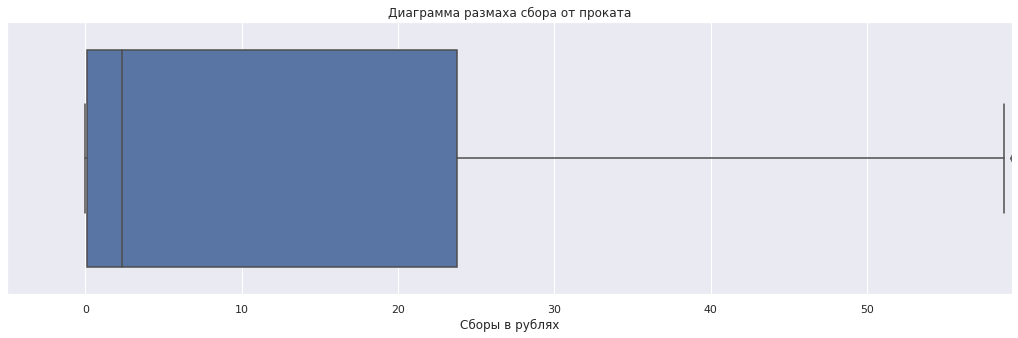

In [62]:
plt.figure(figsize=(18, 5)) 
sns.boxplot(data = data.query('box_office > 0'), x='box_office')
plt.xlim(-5,right_whisker)
plt.title('Диаграмма размаха сбора от проката',  fontsize='12')
plt.xlabel('Сборы в рублях')
plt.show()


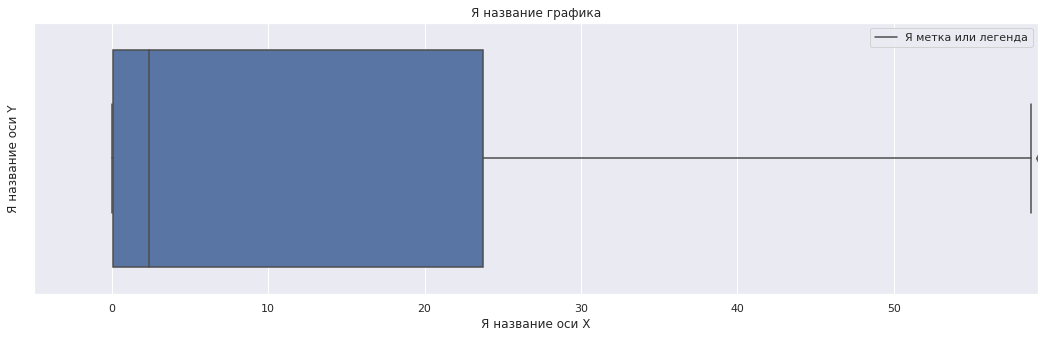

In [63]:
# Комментарий ревьюера 2
plt.figure(figsize=(18, 5)) 
sns.boxplot(data = data.query('box_office > 0'), x='box_office')
plt.xlim(-5,right_whisker)
plt.title('Я название графика')
plt.xlabel('Я название оси Х')
plt.ylabel('Я название оси Y')
plt.legend(['Я метка или легенда'])
plt.show()

<font color='DarkBlue'><b>Комментарий ревьюера</b></font><br>
<font color='Red'>🛠 График не оформлен полностью.</font>

Построим диаграмму размаха для бюджета фильмов и посмотрим на выбивающиеся значения.

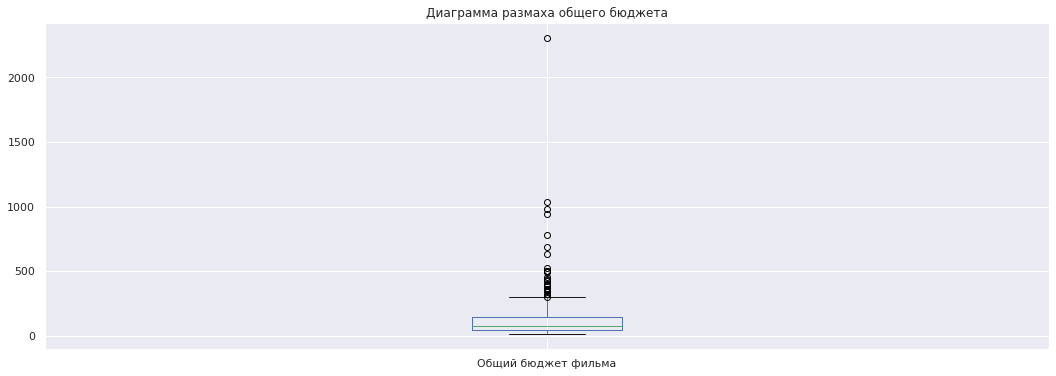

In [64]:
data.plot(y='budget', kind='box', figsize=(18,6), grid=True, label='Общий бюджет фильма')
plt.title('Диаграмма размаха общего бюджета',  fontsize='12')
#plt.xlabel('Общий бюджет фильма')
#report['budget'] /= 10**6
plt.show()

In [65]:
data.query('budget > 600').shape[0]

7

Из диаграммы размаха по собщему бюджету фильмов видно, что значения свыше 0.6 млрд руб. довольно редкие, в целом можем исключить их из выборки, учитывая, что таких значений всего 7.

In [66]:
data.drop(data.query('budget > 600').index, inplace = True)

In [67]:

temp2 = temp.copy()
temp2.budget /= 10**6
temp1, temp2 = data.budget.sum(), temp2.budget.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(35915.1319147536, 42240.265939000004, 14.97)

In [68]:
data.shape[0]

7467

In [69]:
print('В результате предобработки данных было удалено {:.1%}'
      .format(1 - data.shape[0] / old_data_shape) + ' от исходных данных')

В результате предобработки данных было удалено 0.3% от исходных данных


In [70]:
# Комментарий ревьюера
temp2 = temp.copy()
temp2.box_office /= 10**6
temp1, temp2 = data.box_office.sum(), temp2.box_office.sum()
temp1, temp2, round((temp2-temp1)/temp2*100, 2)

(211877.90777285, 241519.72247712998, 12.27)

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [71]:
data['year'] = data['show_start_date'].dt.year

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.


Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 

In [72]:
def get_main_data(df, columns):
    for col in columns:
        df[f'main_{col}'] = df[col].apply(lambda x: x.split(',')[0])
    return df

In [73]:
data = get_main_data(data,['director','genres'])

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [74]:
data['share_support'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']

In [75]:
data.query('~budget.isna()')['share_support'].describe()

count    322.000000
mean       0.524208
std        0.163840
min        0.044043
25%        0.398112
50%        0.592265
75%        0.654194
max        0.784745
Name: share_support, dtype: float64

В среднем доля господдержки в бюджете фильма составляет 52%, что достаточно близко к медианному значению (59%).

- Добавим столбы с показателем ROI, который характеризует окупаемость фильмов, а также общий размер средств государственной поддержки.

In [76]:
data['roi'] = (data['box_office'] - data['budget']) / data['budget']
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

- Добавим столбцы с признаком окупаемости и наличием господдержки

In [77]:
def get_is_true_roi(value):
    if value > 0:
        return 1
    else:
        return 0

def get_is_support(value):
    if value > 0:
        return  1
    else:
        return 0


data['is_roi'] = data['roi'].apply(get_is_true_roi)
data['is_support'] = data['total_support'].apply(get_is_support)

### Шаг 3. Проведите исследовательский анализ данных


In [78]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,genres,box_office,year,main_director,main_genres,share_support,roi,total_support,is_roi,is_support
0,Открытый простор,221048915,2015-11-27 12:00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,...,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик,NaN,NaN,NaN,0,0
1,Особо важное задание,111013716,2016-09-13 12:00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,Данные по продюсеру отсутствуют,«6+» - для детей старше 6 лет,NaN,...,"драма,военный",NaN,2016,Е.Матвеев,драма,NaN,NaN,NaN,0,0
2,Особо опасен,221038416,2016-10-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,0,0
3,Особо опасен,221026916,2016-06-10 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,0,0
4,Особо опасен,221030815,2015-07-29 12:00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,...,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика,NaN,NaN,NaN,0,0


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

Построим столбчатый график с количеством фильмов в прокате в разрезе годов.

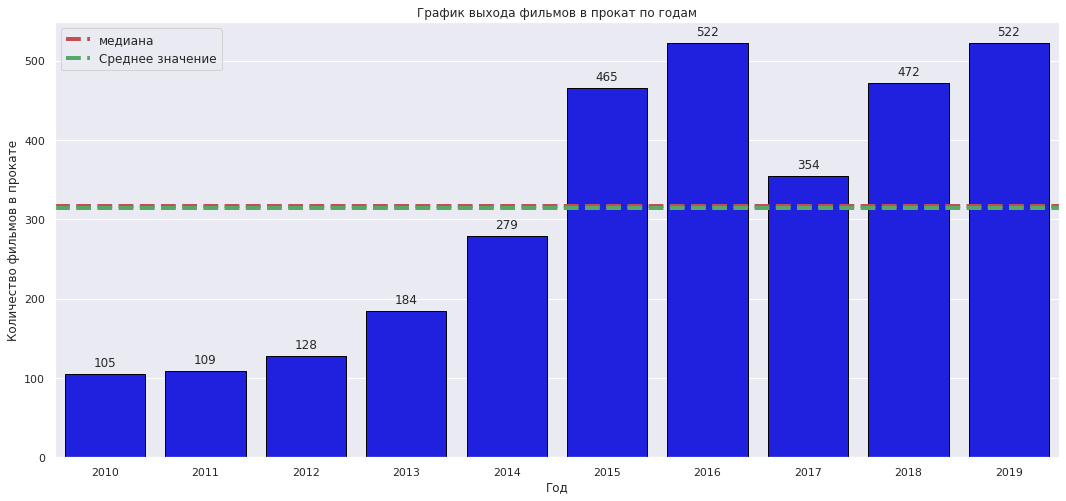

In [79]:
report = data.pivot_table(
    index='year',
    values='box_office',
    aggfunc='count').reset_index().rename(columns={'year': 'год', 'box_office': 'Количество фильмов в прокате'})

plt.figure(figsize=(18, 8)) 
ax = sns.barplot(x='год', y='Количество фильмов в прокате', data=report, color='blue', edgecolor='black')
plt.xlabel('Год')
plt.title('График выхода фильмов в прокат по годам')
plt.axhline(y=report['Количество фильмов в прокате'].median(), linewidth=4, color='r', linestyle='--', label='медиана', alpha=1)
plt.axhline(y=report['Количество фильмов в прокате'].mean(), linewidth=4, color='g', linestyle='--', label='Среднее значение', alpha=1)
plt.legend(prop={'size':12})
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 10
    ax.annotate('{:.0f}'.format(report.iloc[i, 1]), (x, y), ha='center')
plt.show()

In [80]:
print('Доля фильмов, для которых есть информация о сборах составляет', '{0:.1%}'.format(data['box_office'].notna().mean()))

Доля фильмов, для которых есть информация о сборах составляет 42.1%


Анализируя график выше видно, что пики по количеству фильмов в прокате приходятся на 2016 и 2019 гг. (552 фильма вышедших в прокат), чуть меньше в 2015 и 2018 гг. При этом среднее и медианное значения близки и составляют около 315 фильмов. Доля фильмов, для которых есть информация о сборах составляет 42%

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

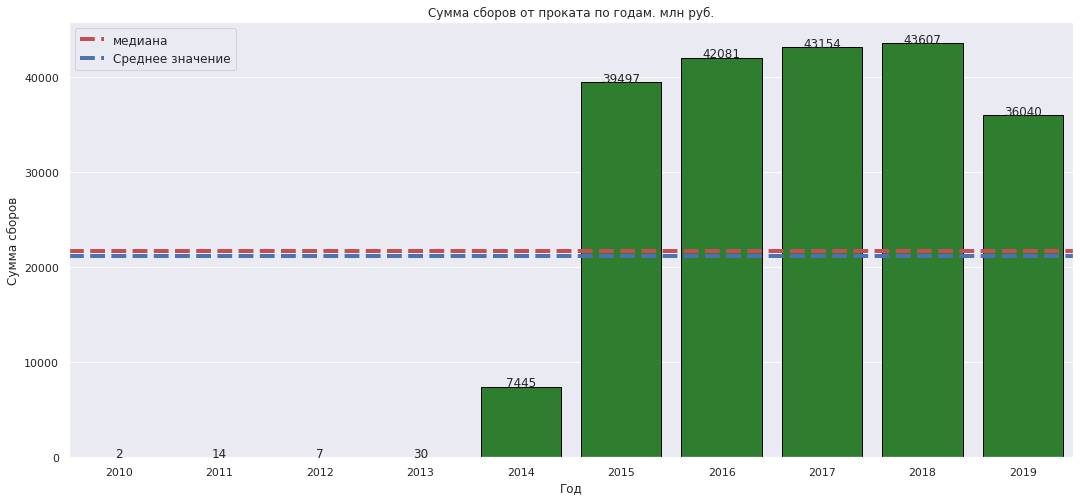

In [81]:
report = data.pivot_table(
    index='year',
    values='box_office',
    aggfunc='sum').reset_index().rename(columns={'year': 'год', 'box_office': 'Сумма сборов'})

plt.figure(figsize=(18, 8)) 
ax = sns.barplot(x='год', y='Сумма сборов', data=report, color='forestgreen', edgecolor='black')
plt.xlabel('Год')
plt.title('Сумма сборов от проката по годам. млн руб.')
plt.axhline(y=report['Сумма сборов'].median(), linewidth=4, color='r', linestyle='--', label='медиана', alpha=1)
plt.axhline(y=report['Сумма сборов'].mean(), linewidth=4, color='b', linestyle='--', label='Среднее значение', alpha=1)
plt.legend(fontsize =12, loc='upper left')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height() + 10
    ax.annotate('{:.0f}'.format(report.iloc[i, 1]), (x, y), ha='center')
plt.show()

Посчитаем среднюю сумму сборов в перод с 2015 по 20199гг.

In [82]:
report.query('год >= 2015')['Сумма сборов'].mean().round(0)

40876.0

Подозрительно выглядят сборы в период с 2010-13 гг., возможно данные содержатся не по всем месяцам. Проверим эту гипотезу. Для этого добавим в датафрейм номер месяца, создадим сводную таблицу в разрезе годов и месяцов и посмотрим на данные.

In [83]:
data['month'] = data['show_start_date'].dt.month

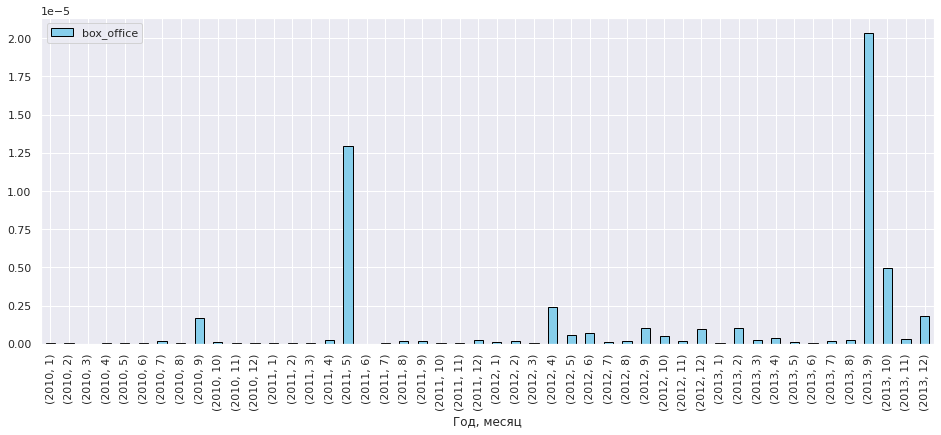

In [84]:
report = data.query('year == 2010 or year == 2011 or year == 2012 or year == 2013').pivot_table(
    index=['year','month'], values='box_office', aggfunc='sum')
report['box_office'] /= 10**6
report.plot(kind='bar', figsize=(16,6), ec='black', color='skyblue')
plt.xlabel('Год, месяц')
plt.show()

Наблюдается довольно низкая сумма сборов в период 2010-13гг. (от 2 до 30 млн руб.), при этом наименьшая сумма сборов в 2010г. Была гипотеза, что это связано с тем, что в данных содержатся не полная информация (не по всем месяцам года), однако эта гипотеза не подтвердилась, что видно из графика выше. Не совсем понятно с чем связан этот факт, возможно есть ошибка в данных, например, в период с 2010 по 2013 гг. информация вносилась не в рублях, а в млн руб. Необходимо уточнить этот вопрос у заказчика.

Наибольшие сборы получили фильмы, вышедшие в 2018г.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года. 

In [85]:
report = data.query('~box_office.isna()').pivot_table(
    index='year',
    values='box_office',
    aggfunc=('mean','median')
)
report.columns=['Средняя сумма сборов', 'Медианная сумма сборов']

In [86]:
report

,Средняя сумма сборов,Медианная сумма сборов
year,,
2010,0.023130,0.001700
2011,0.129383,0.003000
2012,0.054339,0.005660
2013,0.161955,0.003523
2014,26.684415,0.018160
2015,84.940570,4.920933
2016,80.614230,3.744593
2017,121.903529,9.898090
2018,92.388562,8.730278


Анализируя таблицу можно сделать вывод, что минимальное среднее и медианное значения сборов от проката были в 2010г., а максимальные значения были достигнуты в 2017г.

In [87]:
report['ratio'] = (report['Средняя сумма сборов'] / report['Медианная сумма сборов']).round(3)
report

,Средняя сумма сборов,Медианная сумма сборов,ratio
year,,,
2010,0.023130,0.001700,13.606
2011,0.129383,0.003000,43.128
2012,0.054339,0.005660,9.601
2013,0.161955,0.003523,45.977
2014,26.684415,0.018160,1469.406
2015,84.940570,4.920933,17.261
2016,80.614230,3.744593,21.528
2017,121.903529,9.898090,12.316
2018,92.388562,8.730278,10.583


В целом среднее значение выше медианного в 10 раз и более, сильно выбивается 2011, 2013 и 2014г. (среднее значение выше медианного более чем в 40 раз, а в 2014г. почти в 1.5 тыс. раза). Вероятнее всего такие высокие к-ты были получены в результате того, что в выборке осталось чуть больше 500 значений, которые лежат за границей правого уса и завышают среднее значение.

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

Построим линейчатый график для периода с 2015 по 2019 гг.

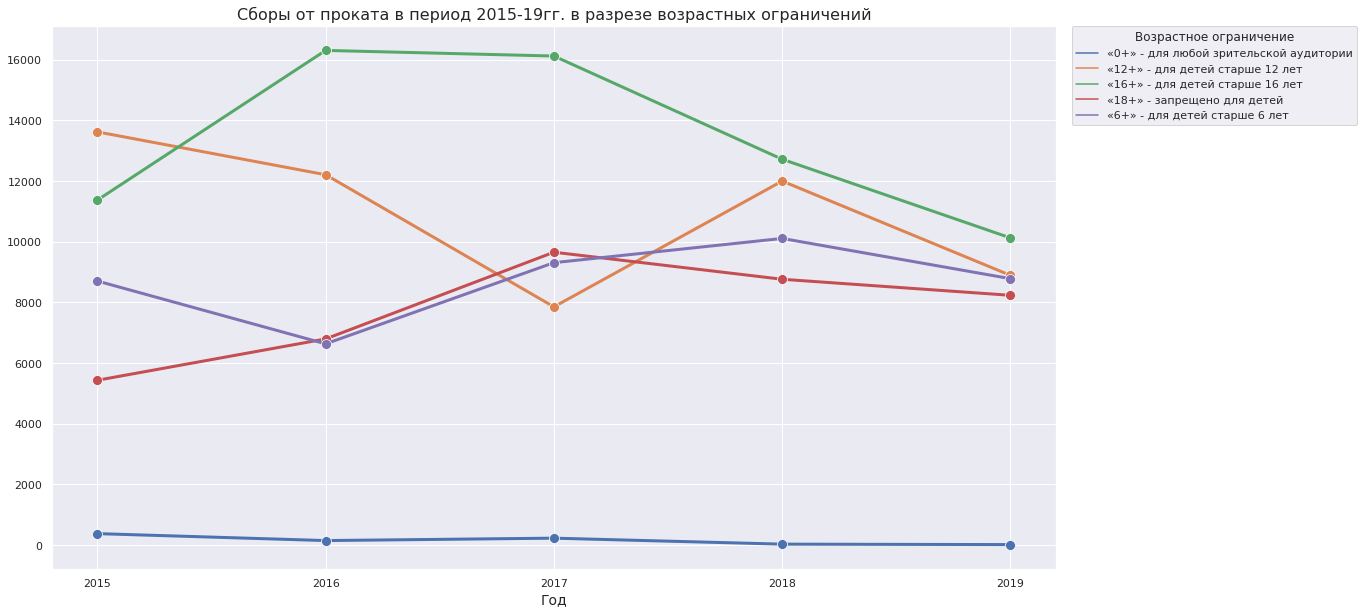

In [88]:
sns.set(context='notebook', rc={'figure.figsize':(18,10)})
ax = sns.lineplot(
    data=data.query('year >=2015 and year <=2019').pivot_table(
        index='year',
        columns = 'age_restriction',
        values = 'box_office',
        aggfunc='sum' 
     ), 
    marker='o', linewidth=3, markersize=10, dashes=False
)
list_year = [2015,2016,2017,2018,2019]
ax.set_title('Сборы от проката в период 2015-19гг. в разрезе возрастных ограничений', fontsize='16')
ax.set_xlabel('Год', fontsize='14')
ax.set_xticks(list_year)
plt.legend(bbox_to_anchor=(1.01,1.01),loc='upper left', title='Возрастное ограничение')
plt.show()


In [89]:
data.query('year >=2015 and year <=2019 and box_office.notna()').groupby('age_restriction')['box_office'].count()

age_restriction
«0+» - для любой зрительской аудитории     91
«12+» - для детей старше 12 лет           345
«16+» - для детей старше 16 лет           798
«18+» - запрещено для детей               791
«6+» - для детей старше 6 лет             310
Name: box_office, dtype: int64

Больше всего в прокате за период 2015-2019 г. собирали фильмы для возрастной аудитории «16+». Возможно это связано с тем, что таких фильмов больше всего выходит в прокат. Примерно такое-же количество выходят для возрастной аудитории «18+», но для таких фильмов аудитория меньше, отсюда и сборы ниже.

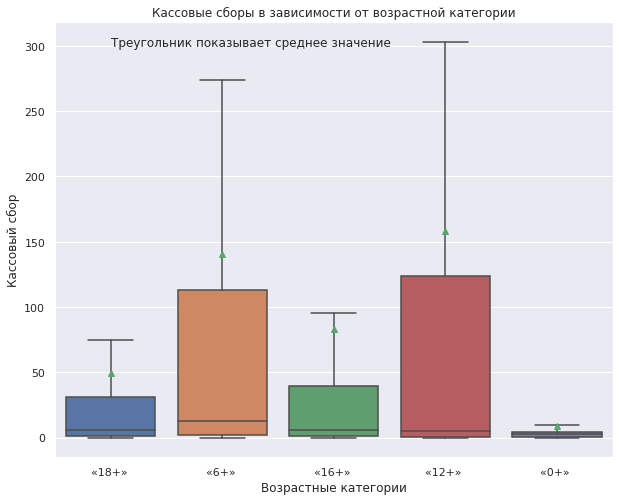

In [90]:
# Комментарий ревьюера 2
import seaborn as sns
temp = data.copy()
# для удобства укоротим названия категорий
def get_first_value(s, sep = ','):  # Функция для выбора первого элемента из перечисления
    value_lst = s.split(sep=sep)
    return value_lst[0]

temp['age_restriction'] = temp['age_restriction'].apply(lambda x: get_first_value(x, sep='-'))
# сохраним маску для среза по годам
year_mask = temp['year'] >= 2015

plt.figure(figsize=(10, 8))
(sns.boxplot(data = temp.loc[year_mask], y = 'box_office', x='age_restriction', showfliers=False, showmeans=True)
    .set(title = 'Кассовые сборы в зависимости от возрастной категории', 
         xlabel = 'Возрастные категории', ylabel = 'Кассовый сбор'))
plt.text(0, 300,'Треугольник показывает среднее значение')
plt.show()

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

#### Проанализируем фильмы, которые


Выделем фильмы которые получили государственную поддержку

In [91]:
data_support = data.query('budget.notna()')

In [92]:
data_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 1281 to 7478
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   title                  322 non-null    object        
 1   puNumber               322 non-null    int64         
 2   show_start_date        322 non-null    datetime64[ns]
 3   type                   322 non-null    object        
 4   film_studio            322 non-null    object        
 5   production_country     322 non-null    object        
 6   director               322 non-null    object        
 7   producer               322 non-null    object        
 8   age_restriction        322 non-null    object        
 9   refundable_support     322 non-null    float64       
 10  nonrefundable_support  322 non-null    float64       
 11  budget                 322 non-null    float64       
 12  financing_source       322 non-null    object        
 13  r

In [93]:
# функция, получающая на вход название признака, и возвращающая границы "усов"
def get_whiskers(column):
    describe_data = data_support[column].describe()
    
    #межквартирльный размах
    iqr = describe_data[6] - describe_data[4]
    
    #левый и правый "ус"    
    left_whisker = round(describe_data[4] - 1.5 * iqr, 2)
    right_whisker = round(describe_data[6] + 1.5 * iqr, 2)

    
    if left_whisker < describe_data[3]: left_whisker = describe_data[3] 
        
   
    if right_whisker > describe_data[7]: right_whisker = describe_data[7]
        
    return [left_whisker, right_whisker]


In [94]:
# зададим функцию, вычисляющую долю аномальных значений
def get_persent_anomalies_data(column):
    return 'Доля выбивающихся значений из общей выборки для столбца {} составялет {:.1%}'. format(column, len(data_support.loc[data_support[column] > get_whiskers(column)[1]]) / len(data_support))

Видим пропуски в столбце с рейтингом и сбором. Как выше было сказано, рейтинг лучше не заполнять, а по сборам не получится, т.к. вероятнее всего эти фильмы не показывали в кинотеатрах. Поэтому оставим пропуски без заполнений.

**Посмотрим сколько выделяют средств на поддержку кино.**

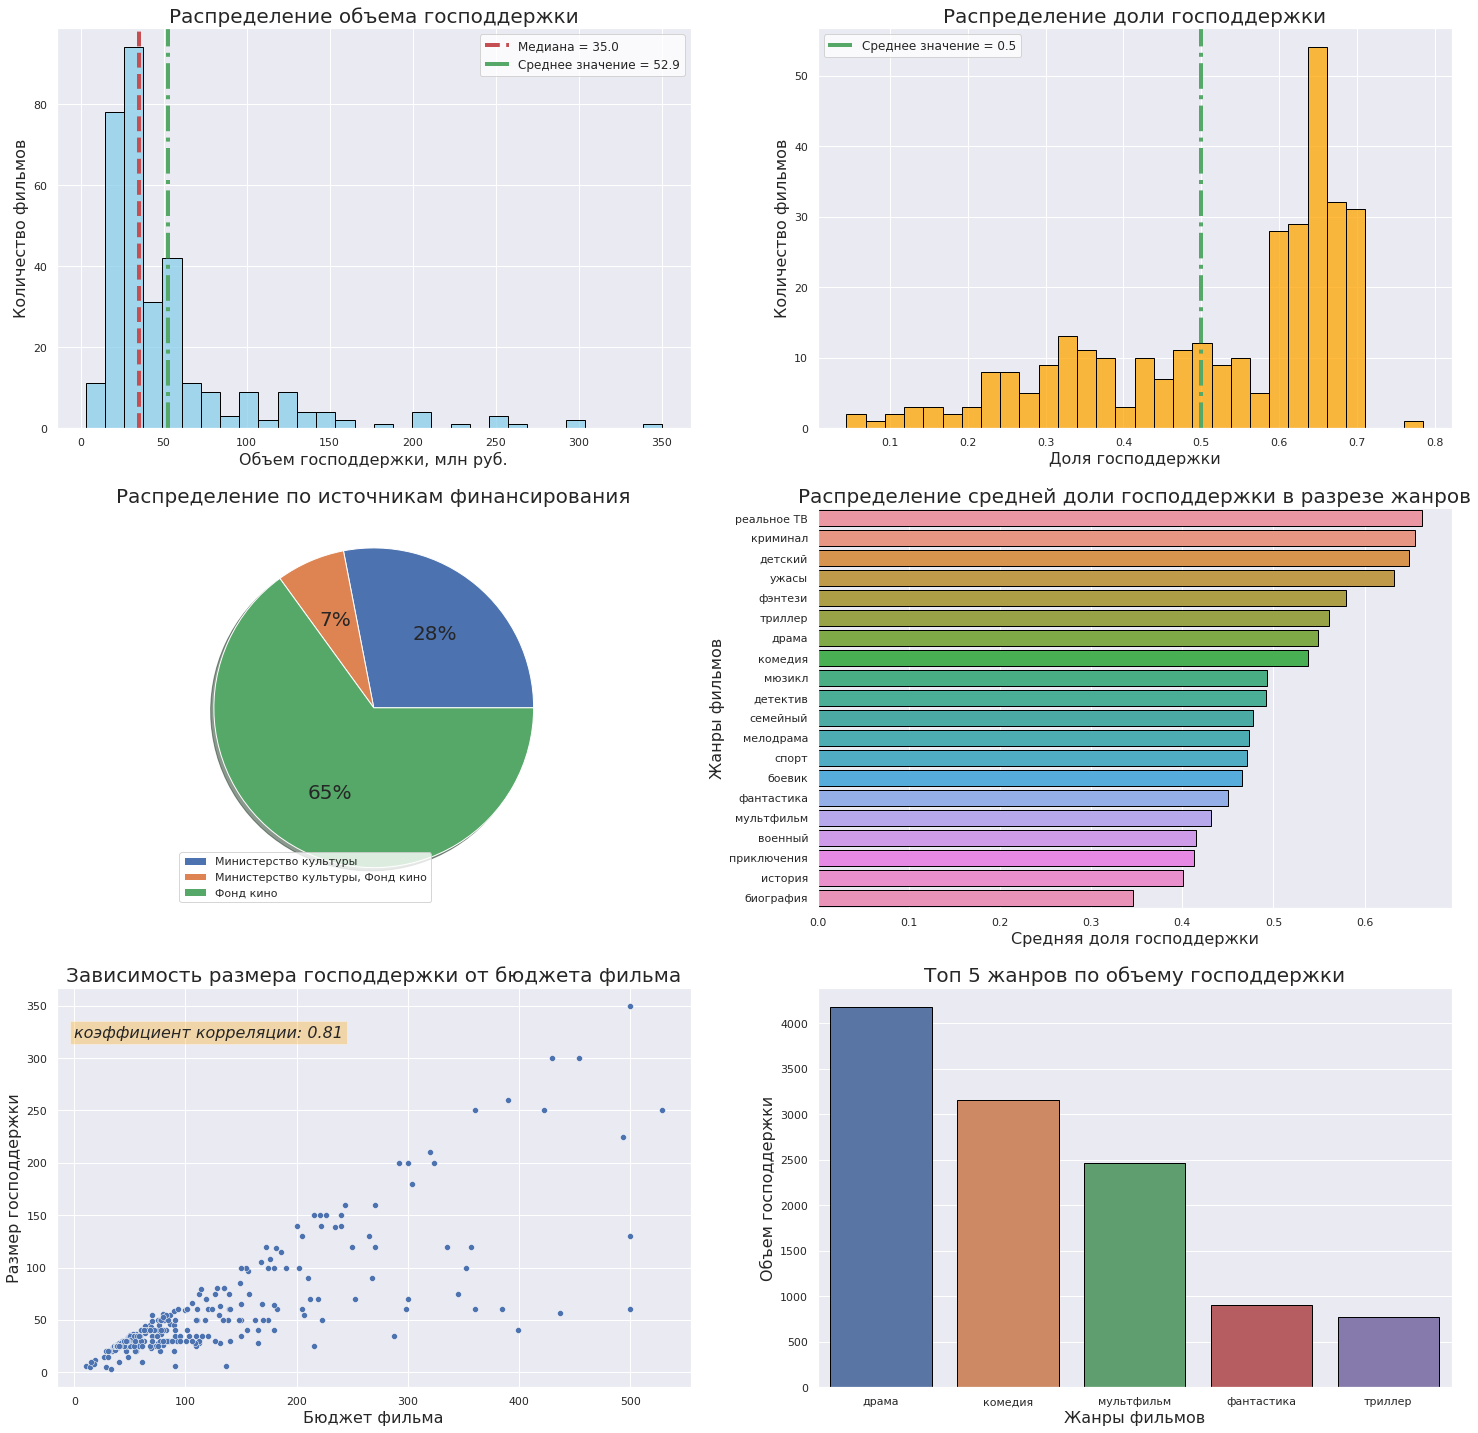

In [95]:
fig, axes = plt.subplots(3, 2, figsize=(25,25))
sns.set_style("white")

#Распределение объема господдержки
sns.histplot(
    data=data_support,
    x='total_support',  
    bins=30, 
    color = 'skyblue',
    ec='black', 
    ax=axes[0,0])

median_value = data_support['total_support'].median().round(1)
mean_value = data_support['total_support'].mean().round(1)

axes[0,0].set_title('Распределение объема господдержки', fontsize=20)
axes[0,0].set_xlabel('Объем господдержки, млн руб.', fontsize=16)
axes[0,0].set_ylabel('Количество фильмов', fontsize=16)
axes[0,0].axvline(x=median_value, linewidth=4, color='r', linestyle='--', label='Медиана = ' + str(median_value), alpha=1)
axes[0,0].axvline(x=mean_value, linewidth=4, color='g', linestyle='-.', label='Среднее значение = ' + str(mean_value), alpha=1)
axes[0,0].legend(fontsize =12, loc='upper right')

#Распределение доли господдержки
sns.histplot(
    data=data_support,
    x='share_support',  
    bins=30, 
    color = 'orange',
    ec='black', 
    ax=axes[0,1])

mean_value = data_support['share_support'].mean().round(1)

axes[0,1].set_title('Распределение доли господдержки', fontsize=20)
axes[0,1].set_xlabel('Доля господдержки', fontsize=16)
axes[0,1].set_ylabel('Количество фильмов', fontsize=16)
axes[0,1].axvline(x=mean_value, linewidth=4, color='g', linestyle='-.', label='Среднее значение = ' + str(mean_value), alpha=1)
axes[0,1].legend(fontsize =12, loc='upper left')

#Распределение по источникам финансирования
data_support.groupby('financing_source')['total_support'].sum().plot(
    y='total_support',
    kind='pie',
    legend=True, 
    labels=None,
    autopct='%.0f%%',
    shadow=True, 
    labeldistance=1,
    fontsize=20,
    ax=axes[1,0])

axes[1,0].set_title('Распределение по источникам финансирования', fontsize=20)
axes[1,0].set_ylabel('')

#Распределение доли господдержки в разрезе жанров
sns.barplot(
    x='share_support', 
    y='main_genres', 
    data = (data_support
            .query('main_genres != "Данные по жанру отсутствуют"')
            .groupby('main_genres')['share_support'].mean()
            .sort_values(ascending=False)
            .to_frame()
            .reset_index()
           ),
    ec='black', 
    ax=axes[1,1]
)

axes[1,1].set_title('Распределение средней доли господдержки в разрезе жанров', fontsize=20)
axes[1,1].set_xlabel('Средняя доля господдержки', fontsize=16)
axes[1,1].set_ylabel('Жанры фильмов', fontsize=16)


#Зависимость размера господдержки от бюджета фильма
sns.scatterplot(
    x='budget', 
    y ='total_support', 
    data = data_support,
    ax=axes[2,0])
axes[2,0].text(0, 320,
         'коэффициент корреляции: ' + str(round(data_support['total_support'].corr(data_support['budget']), 2)), 
         style='italic',
         bbox={'facecolor': 'orange', 'alpha':0.3}, fontsize=16)

axes[2,0].set_title('Зависимость размера господдержки от бюджета фильма', fontsize=20)
axes[2,0].set_xlabel('Бюджет фильма', fontsize=16)
axes[2,0].set_ylabel('Размер господдержки', fontsize=16)

#Топ 5 жанров по объему господдержки
sns.barplot(
    x='main_genres',
    y='total_support', 
    data = (data_support
            .query('main_genres != "Данные по жанру отсутствуют"')
            .groupby('main_genres')['total_support'].sum()
            .sort_values(ascending=False)
            .to_frame()
            .reset_index()
            .head()
           ),
    ec='black', 
    ax=axes[2,1]
)

axes[2,1].set_title('Топ 5 жанров по объему господдержки', fontsize=20)
axes[2,1].set_xlabel('Жанры фильмов', fontsize=16)
axes[2,1].set_ylabel('Объем господдержки', fontsize=16)

plt.show()


In [96]:
print('Границы "нормальных" значений для объема господдержки находятся на отрезке', get_whiskers('total_support'))
print(get_persent_anomalies_data('total_support'))
print('Доля невовратных средств господдержки составялет {:.1%}'
      .format(data_support['nonrefundable_support'].sum() / data_support['total_support'].sum()))

Границы "нормальных" значений для объема господдержки находятся на отрезке [3.0, 109.86]
Доля выбивающихся значений из общей выборки для столбца total_support составялет 10.2%
Доля невовратных средств господдержки составялет 81.4%


Анализируя графики можно сделать следующие выводы:
- в среднем участие государства в бюджете фильмов составляет около 53 млн руб., а медиана 35 млн руб. Есть фильмы, которые получили поддержку в 100, 150 и даже 350 млн руб., правая граница "нормальных" значений (в пределах усов диаграммы размаха) ограничена суммой в 110 млн руб. Доля фильмов, которая выбивается (сума поддержки более 110 млн руб.) составляет около 10%. 
- доля участия государства в бюджете фильмов доходит до 80%, но в среднем составляет около 50%.
- больше всего средств выделяет "Фонд кино" (порядка 65% из всех выделенных средств).
- в таких жанрах как "реальное ТВ, криминал, детский и ужасы" средняя доля участия государства свыше 60%, меньше всего государство оказывает поддержку историческим и биографическим фильмам (средняя доля участия меньше 40%), при этом топ-5 по объему поддержки несколько отличается, лидирует жанр "Драма" (сумма поддержки составила более 4 млрд руб.).
- размер государственной поддержки сильно зависит от бюджета фильма, на что указывает высокий уровень корреляции.
- доля невозвратных средств государственной поддержки достаточно высока и составляет порядка 81%.

In [97]:
data_support.groupby('age_restriction').agg({'total_support':'sum','share_support':'mean'}).sort_values(by='total_support', ascending=False)

,total_support,share_support
age_restriction,,
«12+» - для детей старше 12 лет,6559.394165,0.520862
«16+» - для детей старше 16 лет,4759.053319,0.552454
«6+» - для детей старше 6 лет,4434.269465,0.494626
«18+» - запрещено для детей,1012.346881,0.515225
«0+» - для любой зрительской аудитории,273.520000,0.396834


Наибольшая сумма поддержки оказывается фильмам с возрастным ограничением "12+", а наименьшая поддержка для фильмов для любой зрительской аудитории. При этом средний уровень участия государства в бюджете фильма больше всего у фильмов с возрастным ограничением "16+", меньше всего государство поддерживает фильмы для любой зрительской аудитории.

**Посмотрим на окупаемость фильмов**

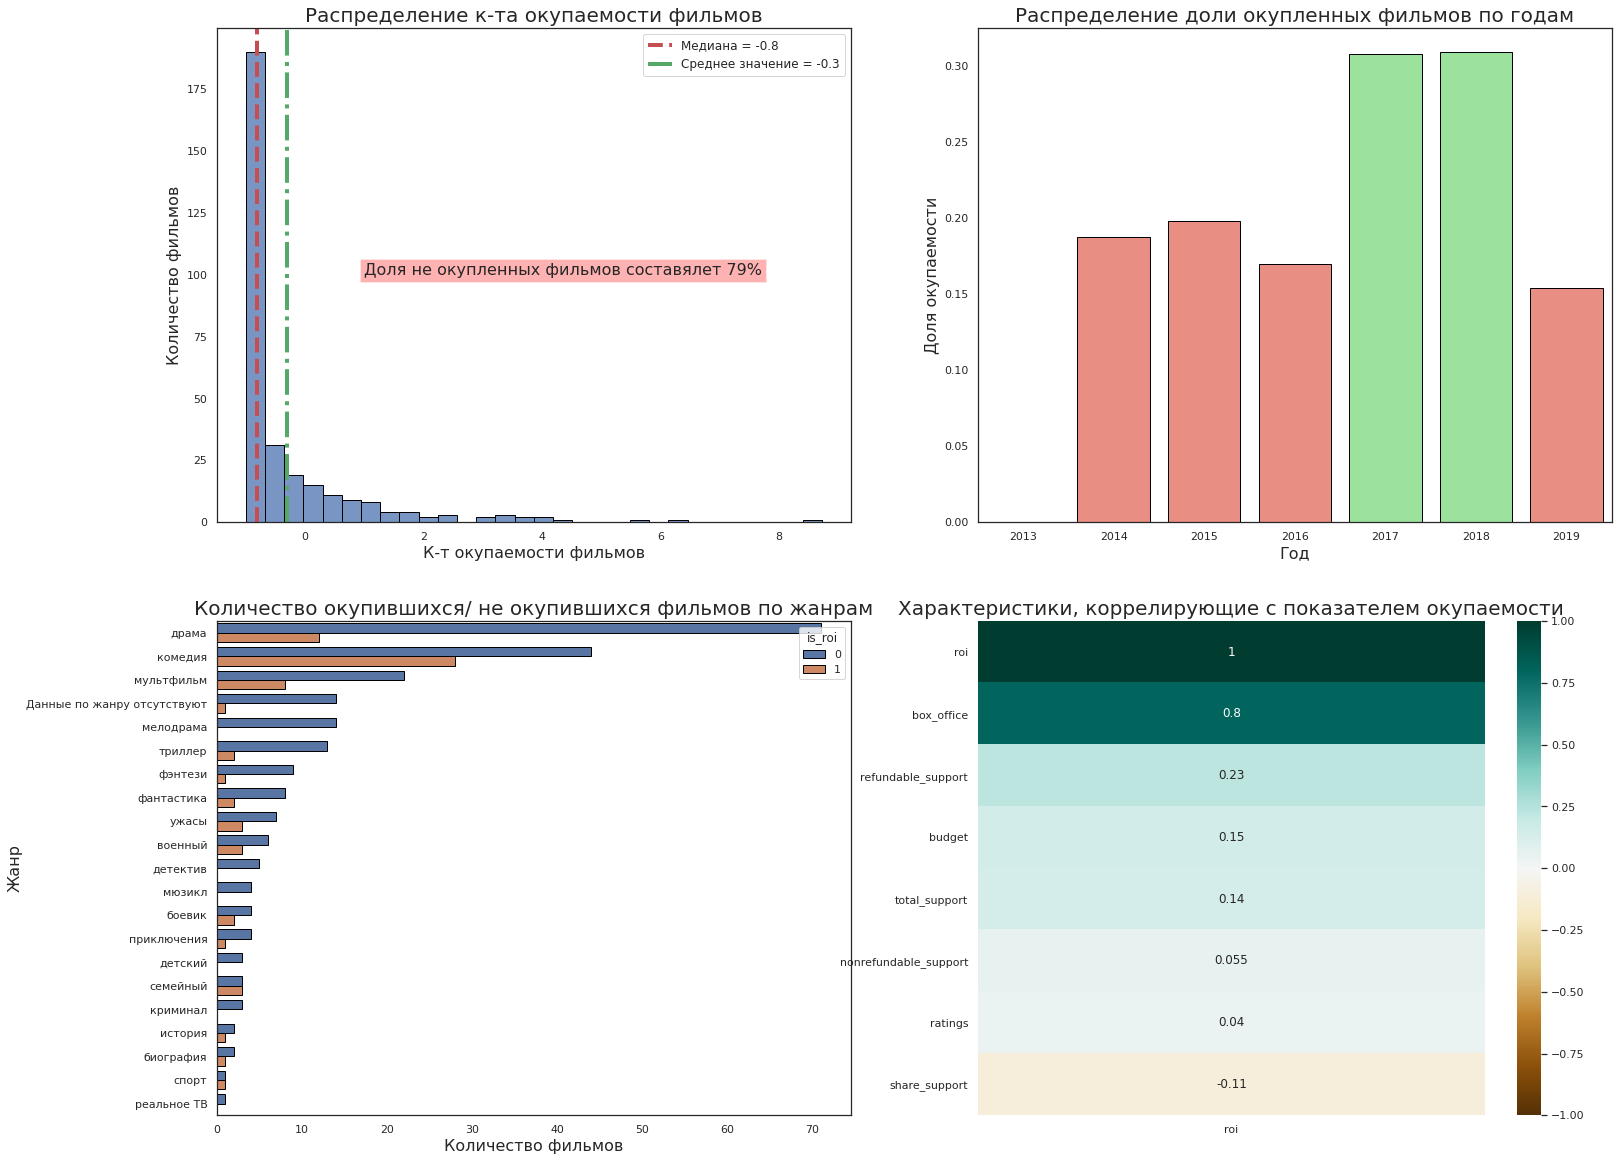

In [98]:
fig, axes = plt.subplots(2, 2, figsize=(25,20))
sns.set_style("white")

#Распределение к-та окупаемости фильмов
sns.histplot(
    data=data_support,
    x='roi',  
    bins=30,
    ec='black',
    ax=axes[0,0])

median_value = data_support['roi'].median().round(1)
mean_value = data_support['roi'].mean().round(1)

axes[0,0].set_title('Распределение к-та окупаемости фильмов', fontsize=20)
axes[0,0].set_xlabel('К-т окупаемости фильмов', fontsize=16)
axes[0,0].set_ylabel('Количество фильмов', fontsize=16)
axes[0,0].axvline(x=median_value, linewidth=4, color='r', linestyle='--', label='Медиана = ' + str(median_value), alpha=1)
axes[0,0].axvline(x=mean_value, linewidth=4, color='g', linestyle='-.', label='Среднее значение = ' + str(mean_value), alpha=1)
axes[0,0].legend(fontsize =12, loc='upper right')
axes[0,0].text(1, 100,
         'Доля не окупленных фильмов составялет {:.0%}'
               .format(data_support.query('is_roi == 0')['is_roi'].count()/len(data_support)), 
         bbox={'facecolor': 'red', 'alpha':0.3}, fontsize=16)

#Распределение доли окупленных фильмов по годам
report = data_support.groupby('year')['is_roi'].mean().reset_index()
sns.barplot(
    x='year',
    y='is_roi', 
    data = report,
    palette=['lightgreen' if x > 0.2 else 'salmon' for x in report['is_roi']],
    ec='black',
    ax=axes[0,1]
)

axes[0,1].set_title('Распределение доли окупленных фильмов по годам', fontsize=20)
axes[0,1].set_xlabel('Год', fontsize=16)
axes[0,1].set_ylabel('Доля окупаемости', fontsize=16)

#Распределение кол-ва окупившихся/ не окупившихся фильмов в зависимости от жанра
sns.barplot(
    x='roi',
    y='main_genres', 
    hue='is_roi',
    data=data_support.pivot_table(
        index=['is_roi','main_genres'],
        values='roi',
        aggfunc='count').reset_index().sort_values(by='roi', ascending=False), 
    ec='black',
    ax=axes[1,0]
)
axes[1,0].set_title('Количество окупившихся/ не окупившихся фильмов по жанрам', fontsize=20)
axes[1,0].set_xlabel('Количество фильмов', fontsize=16)
axes[1,0].set_ylabel('Жанр', fontsize=16)

#Характеристики, коррелирующие с показателем окупаемости
sns.heatmap(
    (data_support
     .loc[:,['ratings','budget','total_support', 'refundable_support', 'nonrefundable_support', 'box_office', 'share_support','roi']]
     .corr()[['roi']]
     .sort_values(by='roi', ascending=False)),
    vmin=-1, 
    vmax=1, 
    annot=True, 
    cmap='BrBG',
    ax=axes[1,1])

axes[1,1].set_title('Характеристики, коррелирующие с показателем окупаемости', fontsize=20)
axes[1,1].set_xlabel('')
axes[1,1].set_ylabel('')
plt.show()

In [99]:
print('Границы "нормальных" значений находятся на отрезке', get_whiskers('roi'))
print(get_persent_anomalies_data('roi'))

Границы "нормальных" значений находятся на отрезке [-0.9999829670329671, 1.01]
Доля выбивающихся значений из общей выборки для столбца roi составялет 9.6%


Фильмы, получившие государственную поддержку, в большей степени не окупаются (доля окупленных фильмов составила порядка 21%). При этом есть отдельные картины с достаточно высоким к-том окупаемости, но практически все они лежат за границей правого уса и по сути не являются нормальными значениями, их доля составляет порядка 9,6%. Нормальные значения (находящиеся в границах "усов" диаграммы размаха) к-та окупаемости лежат в отрезке от -0.99 до 1.01.

Фильмы, вышедшие в 2017-18 гг. явялются наиболее окупаемыми, так доля окупившихся картин составила порядка 30%. В 2013г. ни один фильма не окупился, для всех остальных периодов доля окупившихся фильмов меньше 20%.

Чаще всего окупаются фильмы с жанром комедия (около 30 фильмов окуплены), а фильмы с жанром драма являются наиболее не окупаемыми (около 70 картин).

В целом корреляция показателя окупаемости фильмов есть только с объемом сбора от проката, что собственно вполне ожидаемо.

Посмотрим на топ-5 фильмов по показателю окупаемости. 

In [100]:
(data_support
 .groupby(['title', 'year', 'main_genres'])[['roi','box_office']]
 .sum()
 .round(2)
 .sort_values(by='roi',ascending=False)
 .reset_index()
 .rename(columns={'title':'Фильм', 
                  'year':'Год', 
                  'main_genres': 'Жанр',
                  'roi': ' Показатель окупаемости','box_office':'сборы'})
 .head(5)
 )

,Фильм,Год,Жанр,Показатель окупаемости,сборы
0,Лед,2018,Данные по жанру отсутствуют,8.73,1445.73
1,Я худею,2018,комедия,6.23,633.46
2,"Гуляй, Вася !",2016,комедия,5.64,259.10
3,Самый Лучший День,2015,комедия,4.23,683.03
4,8 новых свиданий,2014,комедия,4.08,393.34


In [101]:
data_support.query('is_roi == 1')['roi'].mean().round(1)

1.5

В основном в ТОП-5 вошли комедии, за исключением самого окупаемого фильма (по которому данные по жанру отсутствуют) - "Лед", картина собрала почти 1.5 млрд руб, значение показателя ROI составялет 8.73, что почти в 6 раз выше среднего значения по всем окупленным фильмам.
Средний показатель окупаемости ТОП-5 фильмам выше почти в 4 раза, чем средний показатель для всех окупившихся фильмов.

Наименьшую окупаемость имеют фильмы с жанром "Драма", а наибольшую окупаемость фильмы с жанром "Комедия".

Посмотрим, как распределяются возрастные группы для окупленных фильмов в зависимости от показателя окупаемости

In [102]:
(data_support.query('is_roi == 1')
 .groupby('age_restriction')['roi'].mean()
 .sort_values(ascending=False)
)

age_restriction
«16+» - для детей старше 16 лет           1.865150
«6+» - для детей старше 6 лет             1.448794
«12+» - для детей старше 12 лет           1.310124
«18+» - запрещено для детей               0.736151
«0+» - для любой зрительской аудитории    0.241595
Name: roi, dtype: float64

В среднем наиболее окупаемые фильмы имеют возрастное ограничение 16+ (хотелось бы отметить, что фильмы, имеющие такое возрастное ограничение, получают наибольшую долю государственной поддержки). Хуже всего окупаются фильмы с возрастным ограничение 0+ (таким фильмам государство оказывает наименьшую поддержку).

**Посмотрим на распределение рейтинга**

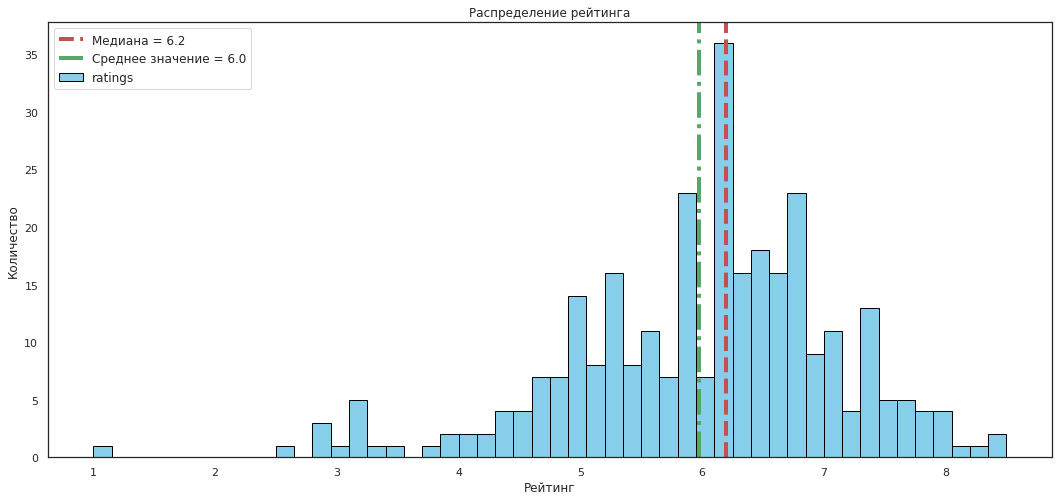

In [103]:
ax = data_support.plot(
    y='ratings', 
    kind='hist', 
    bins=50, 
    figsize=(18,8), 
    ec='black', 
    color='skyblue')
plt.title('Распределение рейтинга')

label_name_median = 'Медиана = ' + str(data_support['ratings'].median())
label_name_mean = 'Среднее значение = ' + str(data_support['ratings'].mean().round(1))

plt.axvline(x=data_support['ratings'].median(), linewidth=4, color='r', linestyle='--', label=label_name_median, alpha=1)
plt.axvline(x=data_support['ratings'].mean(), linewidth=4, color='g', linestyle='-.', label=label_name_mean, alpha=1)
plt.legend(fontsize =12, loc='upper left')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

In [104]:
print('Границы "нормальных" значений находятся на отрезке', get_whiskers('ratings'))

Границы "нормальных" значений находятся на отрезке [3.2, 8.5]


Проанализировав гистограмму видно, что чаще всего фильмы, получившие государственную поддержку получают рейтинг около 6.2, что соответствует медианному значению. Среднее значение немного отличается от медианного за счет «выбросов», лежащих за границей левого уса (рейтинг менее 3.2).

Посмотрим, как меняется медианное значение рейтинга по годам

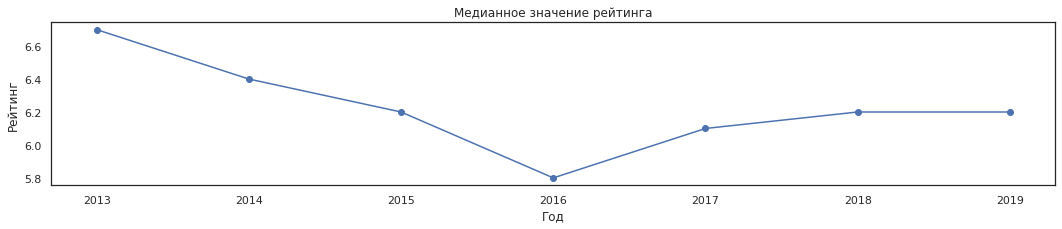

In [105]:
plt.figure(figsize=(18, 3))
data_support.groupby('year')['ratings'].median().plot(marker='o')
plt.title('Медианное значение рейтинга')
plt.xlabel('Год')
plt.ylabel('Рейтинг')
plt.show()

Максимальное медианное значение рейтинга было в 2013г. и затем наблюдается снижение до 2016 включительно. На уровень 2015г. удалось выйти только в 2019г.

Посмотрим на распределение рейтинга по жанрам.

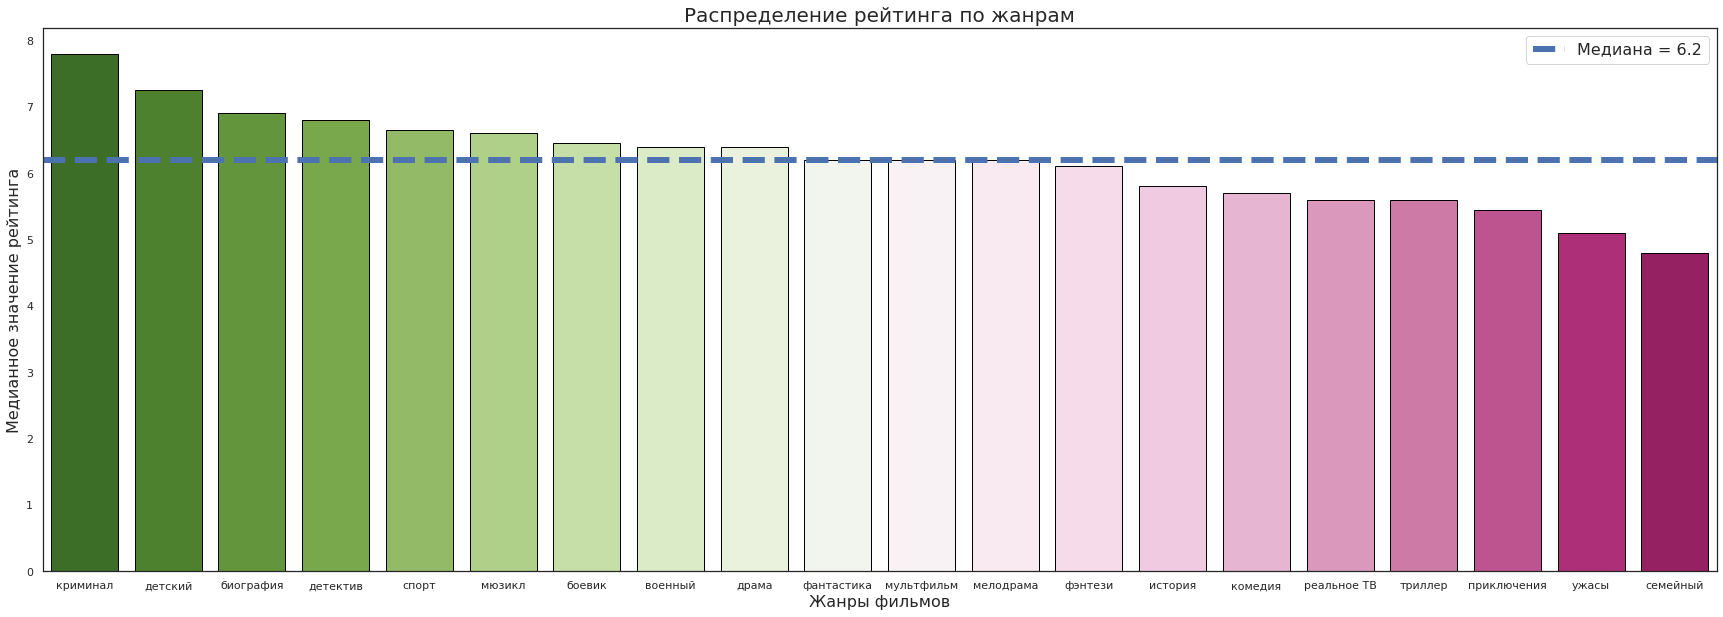

In [106]:
plt.figure(figsize=(30, 10))
sns.barplot(
    x='main_genres',
    y='ratings', 
    data = (data_support
            .query('ratings.notna()')
            .groupby('main_genres')['ratings'].median()
            .sort_values(ascending=False)
            .to_frame()
            .reset_index()
           ),
    ec='black',
    palette=sns.color_palette('PiYG_r', 20)
)

label_name_median = 'Медиана = ' + str(data_support['ratings'].median())
plt.axhline(y=data_support['ratings'].median(), linewidth=6, color='b', linestyle='--', label=label_name_median, alpha=1)

plt.title('Распределение рейтинга по жанрам', fontsize=20)
plt.xlabel('Жанры фильмов', fontsize=16)
plt.ylabel('Медианное значение рейтинга', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.show()

Наибольший рейтинг имеют фильмы с жанром "криминал", однако ни один фильм с таким жанром не окупился и при этом этот жан имеет довольно высокий уровень государственной поддержки (в среднем свыше 60%). Наихудший рейтинг получали фильмы с жанром "семейный". В целом медианное значение рейтинга для жанров "Криминал, детский, биография, детектив, спорт, мюзикл, боевик, военный и драма" выше, чем медианное значение в целом по всей выборке.

Сравним средние рейтинги окупившихся фильмов и нет.

In [107]:
data_support.groupby('is_roi')['ratings'].mean().round(2)

is_roi
0    5.95
1    6.07
Name: ratings, dtype: float64

У окупившихся фильмов средний рейтинг выше (примерно на 2%). 

Сравним средний, медианный и максимальный рейтинг у фильмов получивших государственную поддержку и нет.

In [108]:
data.query('ratings.notna()').groupby('is_support')['ratings'].agg({'max','mean','median'}).round(2)

,mean,median,max
is_support,,,
0,6.50,6.6,9.2
1,5.98,6.2,8.5


В целом фильмы без государственной поддержки получают рейтинги выше, чем фильмы с государственной поддержкой.

### Шаг 5. Напишите общий вывод

**Анализируя данные о российском кинопрокате за период с 2010 по 2019 гг. можно сделать следующие выводы**:
- в среднем в год в прокат выходит порядка 315 фильмов, при этом наибольшее количества фильмов выходило в 2016 и 2019 гг. 
- доля фильмов, для которых есть информация о сборах составляет 42%. Сумма сборов в период с 2015 по 2019 гг. в среднем около 40.8 млрд руб. Наибольшие сборы принесли фильмы, вышедшие в прокат в 2018 г. (порядка 43.6 млрд руб.), в 2019г. наблюдается снижение (до 36 млрд руб.). В данных наблюдается довольно низкая сумма сборов в период 2010-13гг. (от 2 до 30 млн руб.). Была гипотеза, что это связано с тем, что в данных содержатся не полная информация (не по всем месяцам года), однако эта гипотеза не подтвердилась. Не совсем понятно с чем связан факт таких низких, возможно выборке данные за 2010-13гг. представлены в единицах измерения, которые отличаются от других периодов, например, в период с 2010 по 2013 гг. информация вносилась не в рублях, а в млн руб. Эту гипотезу необходимо уточнить у заказчика.
- анализируя период с 2015 по 2019 гг. было установлено, что фильмы для возрастной аудитории "16+" имеют наибольшие сборы, возможно это связано с тем, что большинство фильмов, которые выходят в прокат. Можно предположить, что это связано с тем, что в прокат больше всего выходит фильмов именно с возрастным ограничим "16+". Также достаточно много фильмов имеют возрастное ограничение "18+", но для таких фильмов, аудитория меньше и, как следствие, сборы ниже.

**При анализе фильмов, получивших государственную поддержку было установлено следующее**:
- данные по объему государственной поддержки присутствуют только по российским фильмам и не в полном объеме (только по 20% из всех российских фильмов)
- в среднем доля участия государства в бюджете фильмов составляет около 50% и при этом в среднем выделяется около 53 млн руб. Больше всего средств выделяет "Фонд кино" (порядка 65% из всех выделенных средств). В среднем более чем на 60% государство учувствует в фильмах с жанром "реальное ТВ, криминал, детский и ужасы". При этом по объему вложенных средств больше всего государство выделило на поддержку фильмов с жанром "Драма". Также выявлен высокий уровень корреляции между объемом государственной поддержки и бюджета фильма. Установлено, что государство больше всего оказывает поддержку для фильмов с возрастным ограничением "12+ и 16+". 
- в целом фильмы, получившие государственную поддержку, довольно плохо окупается (окупилось порядка 21% фильмов). Фильмы, которые выходили в прокат в 2017 и 2018 гг. являются наиболее окупаемыми (окупилось около 30%), в других периодах доля окупившихся фильмов меньше 20%. Лучше всего окупаются комедии, а хуже всего драмы. Самым окупаемым фильмов является картина "Лед", показатель окупаемости составляет 8.73, что почти в 6 раз выше среднего значения по всем окупленным фильмам, за время проката фильм собрал почти 1.5 млрд руб. Наиболее окупаемые фильмы имеют возрастное ограничение 16+ (как было отмечено выше, фильмы с таким возрастным ограничением получают наибольшую долю государственной поддержки). Хуже всего окупаются фильмы с возрастным ограничение 0+ (таким фильмам государство оказывает наименьшую поддержку).
